<font size="5">**Imports**</font>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

<font size="5">**Dataset preparation**</font>

In [ ]:
risk_factors = pd.read_csv(r"C:\Users\Dana\OneDrive\Desktop\assignment2\Risk_factors.csv")
#Remove redundant columns
risk_factors = risk_factors.drop(['STRUCTURE_ID', 'STRUCTURE', 'STRUCTURE_NAME', 'ACTION', 
                                  'REF_AREA', 'FREQ', 'Frequency of observation', 'MEASURE', 
                                  'AGE', 'SEX', 'UNIT_MEASURE','METHODOLOGY', 'Measurement method', 
                                  'Time period', 'Observation value', 'OBS_STATUS', 'UNIT_MULT', 
                                  'Unit multiplier', 'DECIMALS','Decimals'], axis = 1)
#Rename certain columns
risk_factors = risk_factors.rename(columns={"TIME_PERIOD": "Time period", 
                                            "OBS_VALUE": "Observation value"})

<font size="5">**Line plot**</font>

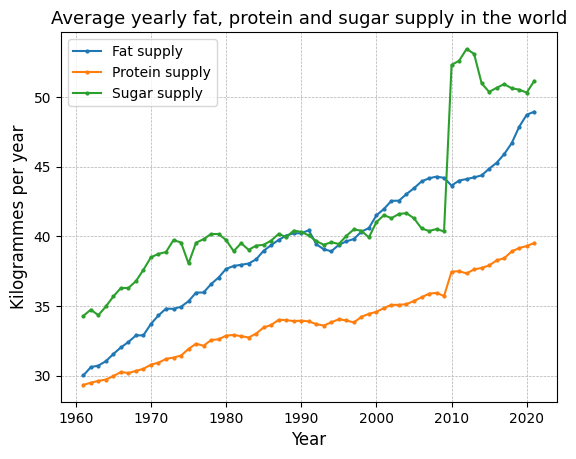

In [3]:
#Filter out required data for the plot
supply_filter = ['Fat supply', 'Protein supply', 'Sugar supply']
yearly_supply = risk_factors.loc[(risk_factors['Measure'].isin(supply_filter))]

#Unit of fat and protein supply is grammes per day, approximate the value in kilogrammes per year 
yearly_supply.loc[risk_factors['Measure'] == 'Fat supply', 
                  'Observation value'] = risk_factors.loc[risk_factors['Measure'] == 
                  'Fat supply',  'Observation value'] * 0.365
yearly_supply.loc[risk_factors['Measure'] == 'Protein supply', 
                  'Observation value'] = risk_factors.loc[risk_factors['Measure'] == 
                  'Protein supply',  'Observation value'] * 0.365

#Calculate the mean supply values for each year using data of all countries
yearly_supply_plot = yearly_supply.groupby(['Time period',
                                            'Measure'])['Observation value'].mean().unstack()

#Construct the line plot
yearly_supply_plot.plot(kind='line', 
                        marker = 'o', 
                        markersize = 2)
plt.title('Average yearly fat, protein and sugar supply in the world', 
          fontsize = 13)
plt.ylabel('Kilogrammes per year', 
           fontsize = 12)
plt.xlabel('Year', 
           fontsize = 12)
plt.grid(linestyle = '--', 
         linewidth = '0.5')
plt.legend(title = None)
plt.show()